In [36]:


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import missingno as msno 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer
from sklearn.linear_model import LinearRegression
import plotly.graph_objs as go
import plotly.express as px
from scipy.stats import shapiro
from scipy.stats import normaltest
from scipy.stats import chi2_contingency
from scipy.stats import chi2
import scipy.stats as stats
from numpy import median
from numpy import std

from scipy import stats
import os

# **What is Hypothesis Testing**

### Hypothesis testing is an act in statistics with which an analyst tests an assumption regarding a population parameter. It is used extensively to assess the plausibility of a hypothesis by using sample data. The assumptions made might be correct or it may not be. Data alone isn't interesting enough. It is the interpretation that we are really interested in.





### Table of Contents


Getting familiar with our data 

* Data types and data completeness
* Feature engineering
* Statistical summary
* Handling outliers
* Handling missing values

Visual Exploratory Data Analysis

* Diploma distribution by income level
* Average income by diploma
* Spending by Income
* Diploma distribution by marital situation
* Income level by parental status

Statistical Hypothesis Testing

* Test for normality
    * Graphical Method : Histogram plot
    * Statistical Method : Shapiro test
* Rank Significance Tests
    * Numerical variables : Mann-Whitney's test
* Rank Correlation Tests
    * Numerical variables : Spearman test
    * Categorical variables : Chi-square test


   

# **1. Getting familiar with data**

In [37]:
data = pd.read_csv('marketing_data.csv')
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,05-11-2014,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,04-08-2014,0,6,...,2,7,1,0,0,0,0,1,0,SP


In [38]:
data.shape

(2240, 28)

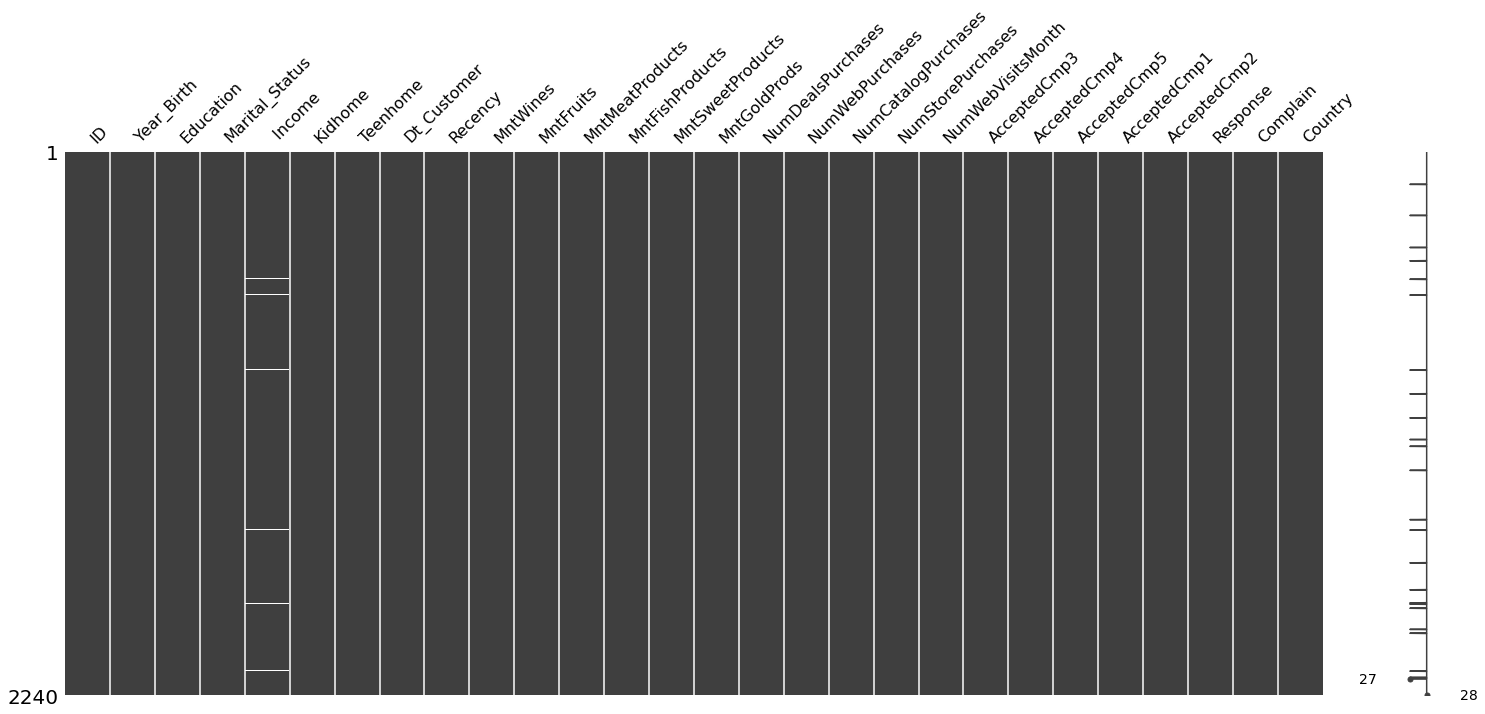

In [39]:
# Visualize the general missing values of data
msno.matrix(data)
plt.show()

In [40]:
missingvalues = data.isnull().sum()
print(missingvalues.loc[missingvalues!=0], '\n')

 Income     24
dtype: int64 



### **Data types and data completeness**

**Column Details:**

ID: Customer's Unique Identifier

Year_Birth: Customer's Birth Year

Education: Customer's education level

Marital_Status: Customer's marital status

Income: Customer's yearly household income

Kidhome: Number of children in customer's household

Teenhome: Number of teenagers in customer's household

Dt_Customer: Date of customer's enrollment with the company

Recency: Number of days since customer's last purchase

MntWines: Amount spent on wine in the last 2 years

MntFruits: Amount spent on fruits in the last 2 years

MntMeatProducts: Amount spent on meat in the last 2 years

MntFishProducts: Amount spent on fish in the last 2 years

MntSweetProducts: Amount spent on sweets in the last 2 years

MntGoldProds: Amount spent on gold in the last 2 years

NumDealsPurchases: Number of purchases made with a discount

NumWebPurchases: Number of purchases made through the company's web site

NumCatalogPurchases: Number of purchases made using a catalogue

NumStorePurchases: Number of purchases made directly in stores

NumWebVisitsMonth: Number of visits to company's web site in the last month

AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise (Target variable)

AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise (Target variable)

AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise (Target variable)

AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise (Target variable)

AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise (Target variable)

Response: 1 if customer accepted the offer in the last campaign, 0 otherwise (Target variable)

Complain: 1 if customer complained in the last 2 years, 0 otherwise

Country: Customer's location

### **Feature Engineering**

In [41]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4    Income              2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

**Using the info function, we can pull the following information from our dataset :**

We have **5** categorical variables and **23** numerical variables

We have missing values for the Income variable

We see that column_name **"Income"** has a space before it's name that will create problems in further analysis, so we'll rename it.


There looks a problem with 2 column's datatypes. We need to change the datatype of **"Income"** column into int64 so that it can be used for further calculations.

In [42]:
data.rename(columns={' Income ':'Income'},inplace=True)
data["Income"] = data["Income"].str.replace("$","").str.replace(',', '')
data["Income"] = data["Income"].astype(float)

Having a first look at the row data enables us to start thinking at some useful variables we could create in order to better understand our dataset and reveal precious information.

**We wrill create several variables :**

Variable Age in replacement of the variable Year_birth

Variable Spending as the sum of the amount spent on the 6 product categories

Variable Marital_Situation to group the different marital status in only 2 comprehensive categories : In couple vs Alone

Variable Has_child as a binary variable equal to Yes if the customer has 1 child or more

Variable Educationnal_years as the total number of years of education the individual achieved according to its diploma

We will remove the unused variables for this analysis

In [43]:
data['Age']=2021-data['Year_Birth']
data['Spending']=data['MntWines']+data['MntFruits']+data['MntMeatProducts']+data['MntFishProducts']+data['MntSweetProducts']+data['MntGoldProds']
data['Marital_Situation']=data['Marital_Status'].replace({'Divorced':'Alone','Single':'Alone','Married':'In couple','Together':'In couple','Absurd':'Alone','Widow':'Alone','YOLO':'Alone'})
data['Has_child'] = np.where(data.Kidhome+data.Teenhome > 0, 'Yes', 'No')
data['Educational_years']=data['Education'].replace({'Basic':5,'2n Cycle':8,'Graduation':12,'Master':18,'PhD':21})
data=data[['Age','Income','Spending','Marital_Situation','Has_child','Educational_years', 'Education']]

### **Statistical summary**

In [44]:
pd.options.display.float_format = "{:.2f}".format
data.describe()

,Age,Income,Spending,Educational_years
count,2240.00,2216.00,2240.00,2240.00
mean,52.19,52247.25,605.80,14.41
std,11.98,25173.08,602.25,4.51
min,25.00,1730.00,5.00,5.00
25%,44.00,35303.00,68.75,12.00
50%,51.00,51381.50,396.00,12.00
75%,62.00,68522.00,1045.50,18.00
max,128.00,666666.00,2525.00,21.00


The describe function generates for us the 3-Number summary, particularly useful as a first step in our preliminary investigation. Analyzing the statistical summary gives us insightful information in one look :

Average **income** is 52247 dollars while median income is 51300 dollars. The distribution is right skewed with the possible presence of outliers. A little bit later we will handle outliers.

The maximum value being equal to 666666 dollars and the 3rd quartile being only equal to 68522 dollars reinforce this hypothesis

Average **spending** in the last 2 years is 600 dollars while median spending is 396 dollars

Average **age** is 45 years old and the oldest customer is 121 years old which is a pretty (and beautiful) rare event

Average number of years of **education** is 14.4 years which corresponds to a Bachelor degree


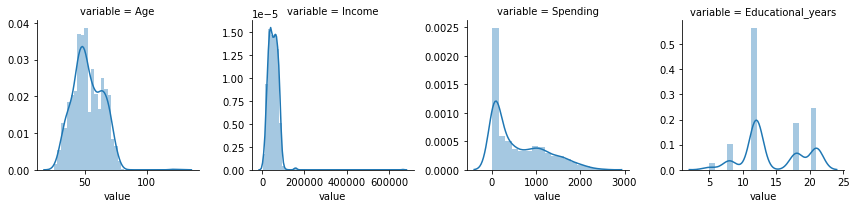

In [46]:
df = pd.DataFrame(data=data, columns=['Age','Income','Spending','Educational_years'])

nd = pd.melt(df, value_vars =df )
n1 = sns.FacetGrid (nd, col='variable', col_wrap=4, sharex=False, sharey = False)
n1 = n1.map(sns.distplot, 'value')
n1

In [ ]:
sns.boxplot(data = data['Income'])

**Insight:** We have a varied range of Customers in this store. People with income as high as 700k yearly income and some customers with less than $100k yearly income as well.

However, majority of customers are with low yearly income and there are only a few which have income more than $100k. This means that the store caters to majorly low-income group customers and doesn't entertain rich/luxury customers.

So, we will remove this outliers otherwise it will pose a problem in further analysis. We use the log transformation technqiue for this.

### **Handling outliers**

An outlier is an observation that differs significantly from other values.  

Outliers can be detected using several methods such as statistical methods or graphical methods.
We will use the Box-Plot graphical method which enables us to vizualize the range of our data and plot the outliers. By using this technique, we first calculate the Interquartile Range (IQR) defined as follow :

**IQR = Q_3-Q_1**

where :
- Q_1 is the first quartile
- Q_3 is the third quartile  

> - Any value greater (lower) 1.5 times the IQR above (below) the third quartile (the first quartile) is defined as a __mild outlier__  
>- Any value greater (lower) 3 times the IQR above (below) the third quartile (the first quartile) is defined as an __extreme outlier__

In [47]:
df = data[['Age','Income','Spending','Educational_years']]

fig = px.box(df.melt(), y="value", facet_col="variable",facet_col_wrap=2, boxmode="overlay", color="variable",height=1000, width=900)
fig.update_yaxes(matches=None)

for i in range(len(fig["data"])):
    yaxis_name = 'yaxis' if i == 0 else f'yaxis{i + 1}'
    fig.layout[yaxis_name].showticklabels = True

fig.update_layout(showlegend=False)
fig.update_xaxes(showline=True, linewidth=2, linecolor='grey')
fig.update_yaxes(showline=True, linewidth=2, linecolor='grey')

fig.show()

Outliers analysis must be done with care. From above we can see that several variables seem to have outliers :

>Age: 3 customers older than the Upper Fence set at 74 years old. We will not remove them

>Income : Several value are greater than the Upper Fence of 113K. While having an income of 150k is not impossible, we will remove the customer who has an income of 666k (Moreover, this observation is defined as an extreme outlier based on our definition stated previously)

>Spending : There is only one outlier which is at the limit of the Upper Fence. We will not remove it

In [48]:
#We remove the only outlier in our dataset before handling missing values
dataset = data.drop(data[data['Income']> 600000].index).reset_index(drop=True)
dataset

,Age,Income,Spending,Marital_Situation,Has_child,Educational_years,Education
0,51,84835.00,1190,Alone,No,12,Graduation
1,60,57091.00,577,Alone,No,12,Graduation
2,63,67267.00,251,In couple,Yes,12,Graduation
3,54,32474.00,11,In couple,Yes,12,Graduation
4,32,21474.00,91,Alone,Yes,12,Graduation
...,...,...,...,...,...,...,...
2234,45,66476.00,689,Alone,Yes,21,PhD
2235,44,31056.00,55,In couple,Yes,8,2n Cycle
2236,45,46310.00,309,Alone,Yes,12,Graduation
2237,43,65819.00,1383,In couple,No,12,Graduation


### **Handling missing values**

As seen earlier, the Income variable has 24 missing values

**There are several ways to handle null-values**:

We can delete the entire column containing null-values

We can delete the rows containing null-values

We can impute the mean value

We can input the mean value of a specific population : in this case we would split by Education diploma

We can use a model to predict missing values

With our dataset, we will go for the last option and use the **K-Nearest Neighbor Imputation**.
KNN Imputation works by imputing the average income of the k nearest neighbors found in the training set for each of the missing value.

We will use Education, Age and Income to run the algorithm. KNNimputer will automatically normalize our data.

In [49]:
imputer = KNNImputer()
imputer = KNNImputer(n_neighbors=5,metric='nan_euclidean')
# fit on the dataset
imputer.fit(dataset[['Income','Age','Educational_years']])
# transform the dataset
X = imputer.transform(dataset[['Income','Age','Educational_years']])
Income_impute=pd.DataFrame(X,columns=['Income','Age','Educational_years'])
dataset['Income']=Income_impute['Income'].reset_index(drop=True)
count_nan = len(dataset) - dataset.count()
print(count_nan)

Age                  0
Income               0
Spending             0
Marital_Situation    0
Has_child            0
Educational_years    0
Education            0
dtype: int64


We don't have any missing value anymore

# **Visual Exploratory Data Analysis**

**Let's plot a correlation matrix to show correlation coefficients between out variables.**

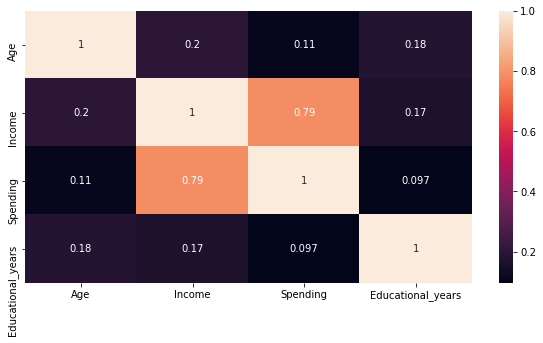

In [50]:
plt.figure(figsize=(10,5))
sns.heatmap(dataset.corr(),annot=True)

### **Diploma distribution by income level**

In [51]:
df = dataset[['Income','Education']]
category_orders={"Education":["Basic","2n Cycle","Graduation","Master","PhD"]}
fig = px.histogram(df, x="Education",y="Income",  histfunc='avg',category_orders=category_orders)
fig.show()

Average income is the highest for PhD owners with 56161 dollars

Average income is the lowest for Basic diploma owners with 20306 dollars

The better the diploma is, the higher the average salary

We will verify later with a statistical test if the average salary of PhD owners is statistically different from Master owners 

### **Spending by Income**

In [52]:
reg = LinearRegression()
fig = go.Figure(data=go.Scatter(name='observations',x=dataset['Spending'], y=dataset['Income'],mode='markers'))

fig.update_traces(hovertemplate='Spending: %{x} <br>Income: %{y}')
fig.show()

Spending seems to be positively correlated with the income level.

We will verify later with a statistical test if the correlation between the annual income and the amount of spending is statistically significant.

### **Diploma distribution by marital situation**

In [53]:
dataset['Marital_Situation']=dataset['Marital_Situation'].replace({'Divorced':'Alone','Single':'Alone','Married':'In couple','Together':'In couple','Absurd':'Alone','Widow':'Alone','YOLO':'Alone'})

In [54]:
df = dataset[['Education','Marital_Situation']]

fig = px.sunburst(df, path=['Marital_Situation','Education'],color_discrete_sequence=px.colors.sequential.Rainbow)
fig.show()

The distribution of diploma category owned seems to be identical for the two population In couple and Alone

We could be tempted to believe that there is no correlation between the diploma owned and the marital status

We will verify later if this hypothesis is true.

### **Income level by parental status**

In [55]:
fig = px.histogram(dataset, 
                   x='Income', 
                   marginal='box', 
                   color='Has_child', 
                   color_discrete_sequence=['blue', 'green'], 
                   title='Income level by parental status')
fig.update_layout(bargap=0.1)
fig.show()

People with high income are largely representing the population who has no child

People having at least 1 child are mainly represented by people with low income



We will verify later if there is a correlation between the income and the fact to have at least one child

# **Statistical Hypothesis Testing**

### **We have 3 business problems to answer usuing Hypothesis Testing:**

1. Is the average salary of PhD owners statistically different from Master owners?

2. Is the correlation between the annual income and the amount of spending statistically significant?

3. Is there correlation between the diploma owned and the marital status?




### **Test for normality**







Before running any hypothesis test, it's important to know which statistical method we should use. Statstical methods are divided in two parts :

* Parametric statistical methods

* Nonparametric statistical methods

To know which one to use, normality tests must be done on our data. If our data have a known and specific distribution, such as the Gaussian distribution; parametric statistical methods must be used. On the contrary, if data are not Gaussian, nonparametric statistical methods should be used.

There are two main ways to know if our data are Gaussian :

* Graphical methods
    * Histogram plot
    * QQ plot

* Statistical methods
    * Shapiro test
    * D'Agostino and Pearson test
    * Anderson-Darling test
    * Kolmogorov-Smirnov test
    


**Graphical methods** are mainly used for qualifying deviations from normality

**Statistical** methods are mainly used for quantifying deviations from normality

#### **Graphical Method**

**Histogram plot**

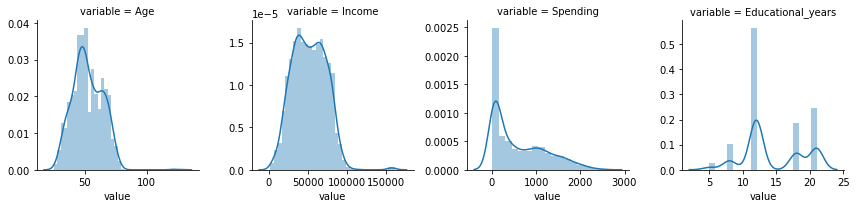

In [56]:
df = pd.DataFrame(data=dataset, columns=['Age','Income','Spending','Educational_years'])
nd = pd.melt(df, value_vars =df )
n1 = sns.FacetGrid (nd, col='variable', col_wrap=4, sharex=False, sharey = False)
n1 = n1.map(sns.distplot, 'value')
n1

From the graph, we can immediately see which variables seem to be Gaussian or Gaussian-like :

Age and Income have Gaussian-like distributions

Spending has a Log-normal distribution

Educationnal_years has a Multinomial distribution

We can verify with a statistical method that none of our variables is Gaussian

**Statistical Method**

Before you can apply the statistical tests, you must know how to interpret the results.

Each test will return at least two things:

**Statistic:** A quantity calculated by the test that can be interpreted in the context of the test via comparing it to critical values from the distribution of the test statistic.

**p-value:** Used to interpret the test, in this case whether the sample was drawn from a Gaussian distribution.


The tests assume that that the sample was drawn from a Gaussian distribution. Technically this is called the null hypothesis, or H0. A threshold level is chosen called alpha, typically 5% (or 0.05), that is used to interpret the p-value.

In the SciPy implementation of these tests, you can interpret the p value as follows.

p <= alpha: reject H0, not normal.

p > alpha: fail to reject H0, normal.


A result above 5% does not mean that the null hypothesis is true. It means that it is very likely true given available evidence. The p-value is not the probability of the data fitting a Gaussian distribution; it can be thought of as a value that helps us interpret the statistical test.

#### **Shapiro test**

In [57]:
X=['Age','Income','Spending','Educational_years']

column_dict= {elem : pd.DataFrame() for elem in X}

def shapiro_test(data):
    stat, p = shapiro(data)
    print('%s : Statistics=%.3f, p=%.3f' % (column,stat, p))
    alpha = 0.05
    if p > alpha:
        print('Sample looks Gaussian (We fail to reject H0)')
    else:
        print('Sample does not look Gaussian (We reject H0)')

for column in X:
    column_dict[column] = dataset[column]
    shapiro_test(column_dict[column])

Age : Statistics=0.976, p=0.000
Sample does not look Gaussian (We reject H0)
Income : Statistics=0.976, p=0.000
Sample does not look Gaussian (We reject H0)
Spending : Statistics=0.865, p=0.000
Sample does not look Gaussian (We reject H0)
Educational_years : Statistics=0.833, p=0.000
Sample does not look Gaussian (We reject H0)


All the p-values are inferior to 0.05 :

We reject the null-hypothesis. Our variables are not Gaussian at a 5% significance level

From this point we have two options :

>Normalizing our data to use parametric statistical methods

>Using directly nonparametric statistical methods

We will go for the second option and use nonparametric statistical methods to test our hypotheses

### **Rank Significance Tests**

#### **Numerical variables : Mann-Whitney's test**

Our first question was to find if the average income of PhD owners is statistically different from the average income of Master owners.

1. Hypothesis statement

**H_0** : The mean ranks of the two groups are equal

**H_a** : The mean ranks of the two groups are not equal

2. Analysis plan formulation

Significance level : We will test our hypothesis at a 5% significance level

Test method : We use the Mann-Whitney's test to determine whether one group has higher or lower income than the other group. 
Mann-Whitney U test is a nonparametric statistical significance test for determining whether two independent samples were drawn from a population with the same distribution. The default assumption or null hypothesis is that there is no difference between the distributions of the data samples. Rejection of this hypothesis suggests that there is likely some difference between the samples. More specifically, the test determines whether it is equally likely that any randomly selected observation from one sample will be greater or less than a sample in the other distribution. If violated, it suggests differing distributions. 
Therefore, if our assumption is correct, the result of the test should enable us to reject the null hypothesis.

In [58]:
#Creation of the samples
Diploma=dataset[['Education','Income']]

Phd_graduate=Diploma[Diploma['Education']=='PhD']
Master_graduate=Diploma[Diploma['Education']=='Master']
Basic_graduate=Diploma[Diploma['Education']=='Basic']
Second_cycle_graduate=Diploma[Diploma['Education']=='2n Cycle']
Graduation_graduate=Diploma[Diploma['Education']=='Graduation']

Mann-Whitney U statistic :

![](https://www.statisticssolutions.com/wp-content/uploads/2010/01/man1.jpg)

Where:

U=Mann-Whitney U test

N1 = sample size one

N2= Sample size two

Ri = Rank of the sample size

In [59]:
# normality tests of our two samples
stat, p = shapiro(Phd_graduate.Income)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=0.943, p=0.000
Sample does not look Gaussian (reject H0)


In [60]:
stat, p = shapiro(Master_graduate.Income)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=0.978, p=0.000
Sample does not look Gaussian (reject H0)


In [61]:
# summarize
print('PhD: median = %.0f stdv = %.1f' % (median(Phd_graduate.Income), std(Phd_graduate.Income)))
print('Master: median = %.0f stdv = %.1f' % (median(Master_graduate.Income), std(Master_graduate.Income)))

print(stats.mannwhitneyu(Phd_graduate.Income, Master_graduate.Income))

if p > alpha:
	print('Means are not statistically different (We fail to reject H0)')
else:
	print('Means are statistically different (We reject H0)')    

PhD: median = 55212 stdv = 20493.9
Master: median = 50943 stdv = 20021.3
MannwhitneyuResult(statistic=82019.5, pvalue=0.013843203616048192)
Means are statistically different (We reject H0)


The p-value is inferior than the significance level of 5%, we can reject the null hypothesis.

We can conclude that the average income of PhD owners is different from the average income of Master owners at a 95% confidence level

### **Rank Correlation Tests**

#### Numerical variables : Spearman Rank Correlation test

The following formula is used to calculate the Spearman rank correlation:

![](https://cdn.questionpro.com/userimages/help_file_images/682/help-682-1.png)


Rs = Spearman rank correlation

D = the difference between the ranks of corresponding variables

n = number of observations

Spearman rank correlation is a non-parametric test that is used to measure the degree of association between two variables.

Our second question was to find if there is a statistically significant correlation between the income and the spending amount.

#### 1. Hypothesis statement  
* __H_0__ : There is no monotonic association between income and spending amount  
* __H_a__ : There is a monotonic association between income and spending amount

#### 2. Analysis plan formulation  
* __Significance level__ : We will test our hypothesis at 5% significance level  
* __Test method__ : We use the Spearman rank correlation test to determine if our two variables are correlated. This statistical method quantifies the degree to which ranked variables are associated by a monotonic function, meaning an increasing or decreasing relationship. As a statistical hypothesis test, the method assumes that the samples are uncorrelated (fail to reject H0).  
Therefore, if our assumption is correct, the result of the test should enable us to reject the null hypothesis.

In [62]:
Spending=dataset[['Spending','Income']]

cor, pval = stats.spearmanr(Spending[['Spending']], Spending[['Income']])
print("Non-Parametric Spearman correlation test : correlation coefficient : %.4f, pval: %.4f" % (cor, pval))

Non-Parametric Spearman correlation test : correlation coefficient : 0.8466, pval: 0.0000


The closer Rs is to +1 or -1, the stronger the likely correlation. A perfect positive correlation is +1 and a perfect negative correlation is -1. The Rs value of 0.8466 suggests a fairly strong positive relationship.

The high correlation coefficient induces a strong positive relationship between the two variables, confirming our alternative hypothesis.


#### **Categorical variables : Chi-square test for independance**

Our third question was to find if there is a statistically significant correlation between the diploma and the marital situation.


#### 1. Hypothesis statement
*H_0*  : Education and Marital_Situation are independent  
*H_a*  : Education and Marital_Situation are not independent

#### 2. Analysis plan formulation  
* __Significance level__ : We will test our hypothesis at a 5% significance level  
* __Test method__ : We use the Chi-square test for independence to determine whether there is a significant relationship between our two categorical variables.

In [63]:
Marital_Situation=dataset[['Education','Marital_Situation']]
crosstab = pd.crosstab(Marital_Situation["Education"], Marital_Situation["Marital_Situation"])
crosstab

Marital_Situation,Alone,In couple
Education,,
2n Cycle,65,138
Basic,20,34
Graduation,408,718
Master,126,244
PhD,177,309


**Degrees of freedom**

Calculating Degrees of Freedom is key when trying to understand the importance of a Chi-Square statistic and the validity of the null hypothesis.

<img src="https://www.thoughtco.com/thmb/ZOngumdBr_1XRgm3bVpHRKF6Kj8=/768x0/filters:no_upscale():max_bytes(150000):strip_icc()/df-58588dcb3df78ce2c3203706.jpg" width="200" height="200" />


where r is the number of levels for one catagorical variable, and $c$ is the number of levels for the other categorical variable.

In [64]:
stat, p, dof, expected = chi2_contingency(crosstab)
print('Degress of freedom = %d' % dof)

Degress of freedom = 4


**The test statistic is a chi-square random variable ( 𝜒2 ) defined by the following equation:
**



<img src="https://www.thoughtco.com/thmb/ns7d4DC1AqVGme2p1-WYqC26r_s=/768x0/filters:no_upscale():max_bytes(150000):strip_icc()/latex_ac74fec08532861eb5f8b87226ebf396-5c59a6fcc9e77c00016b4195.jpg" width="200" height="200" />

Expected frequencies :

The expected frequency counts are computed separately for each level of one categorical variable at each level of the other categorical variable.



Where : 
    
𝑂𝑟 is the observed frequency count at level r of Variable  𝐴 and level  𝑐 of Variable  𝐵
 
𝐸𝑟 is the expected frequency count at level  𝑟 of Variable  𝐴 and level  𝑐 of Variable  𝐵

In [65]:
print(expected)

[[ 72.16971862 130.83028138]
 [ 19.19785619  34.80214381]
 [400.31085306 725.68914694]
 [131.54086646 238.45913354]
 [172.78070567 313.21929433]]


In [66]:
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))

probability=0.950, critical=9.488, stat=1.908


P-value :

The P-value is the probability of observing a sample statistic as extreme as the test statistic. Since the test statistic is a Chi-square, we should use use the Chi-Square table to assess the probability associated with the test statistic by using the degrees of freedom we found above.

In [67]:
if abs(stat) >= critical:
	print('Dependent (We reject H0)')
else:
	print('Independent (We fail to reject H0)')
alpha = 1.0 - prob
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
	print('Dependent (We reject H0)')
else:
	print('Independent (We fail to reject H0)')

Independent (We fail to reject H0)
significance=0.050, p=0.753
Independent (We fail to reject H0)


**Interpretation of the results**

We can interpret the results by two ways :

* The P-value is superior than the significance level of 5%, we fail to reject the null hypothesis.

* The Test-statistic is inferior than the critical value, we fail to reject the null hypothesis.

We can conclude that the marital status is independent from the diploma owned at a 95% confidence level

## **Conclusion**

We have done a great job! Firstly, we did some data preprocessing: haddled missing values, detected and removed outliers.

Second step was Exploratory Data Analysis to undestand relationships between our data.

During the final step, we covered an essenatial part of our research - we applied hypothesis testing to answer the following **3 business problems**:

**1. Is the average salary of PhD owners statistically different from Master owners?**

We assumed **Null hypothesis(H_0)**: The mean ranks of the two groups are equal

**Alternative hypothesis(H_a)**: The mean ranks of the two groups are not equal

We used Mann-Whitney's test, and got p-value < significance level, so we can conclude that the average income of PhD owners is different from the average income of Master owners at a 95% confidence level


**2. Is the correlation between the annual income and the amount of spending statistically significant?**

Using Spearman correlation test we received the following result: correlation coefficient : 0.8466, pval: 0.0000 

There is a strong positive collection, thats why we reject out null hypothesis in favor of the alternative hypothesis - **there is statistically significant correlation between the income and the spending amount**.



**3. Is there correlation between the diploma owned and the marital status?**

**Null hypothesis(H_o)**: Education and Marital_Situation are independant

**Alternative_hypothesis(H_a)**: Education and Marital_Situation are not independent

Using the chi-square test, we can see that the P-value is superior than the significance level of 5%, we fail to reject the null hypothesis.

The Test-statistic is inferior than the critical value, we fail to reject the null hypothesis.

Thats why we conclude that the marital status is independent from the diploma owned at a 95% confidence level